In [1]:
# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# data visualisation and manipulation
import numpy as np
import pandas as pd

import seaborn as sns
import missingno as msno

#configure
# sets matplotlib to inline and displays graphs below the corressponding cell.

import matplotlib.pyplot as plt
from matplotlib import style

style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

#import the necessary modelling algos.
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB

#model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV

from imblearn.over_sampling import SMOTE

#preprocess.
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler,StandardScaler,LabelEncoder,OneHotEncoder

# ann and dl libraraies
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense



import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam

from keras.models import Model


import random as rn

reading csv and printing top few values

In [2]:
df = pd.read_csv('../input/hr-dataset/HR_Dataset.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


to know the shape of the imported data

In [3]:
df.shape

(14999, 10)

In [4]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Departments ', 'salary'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Departments            14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [6]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Departments              0
salary                   0
dtype: int64

<AxesSubplot:>

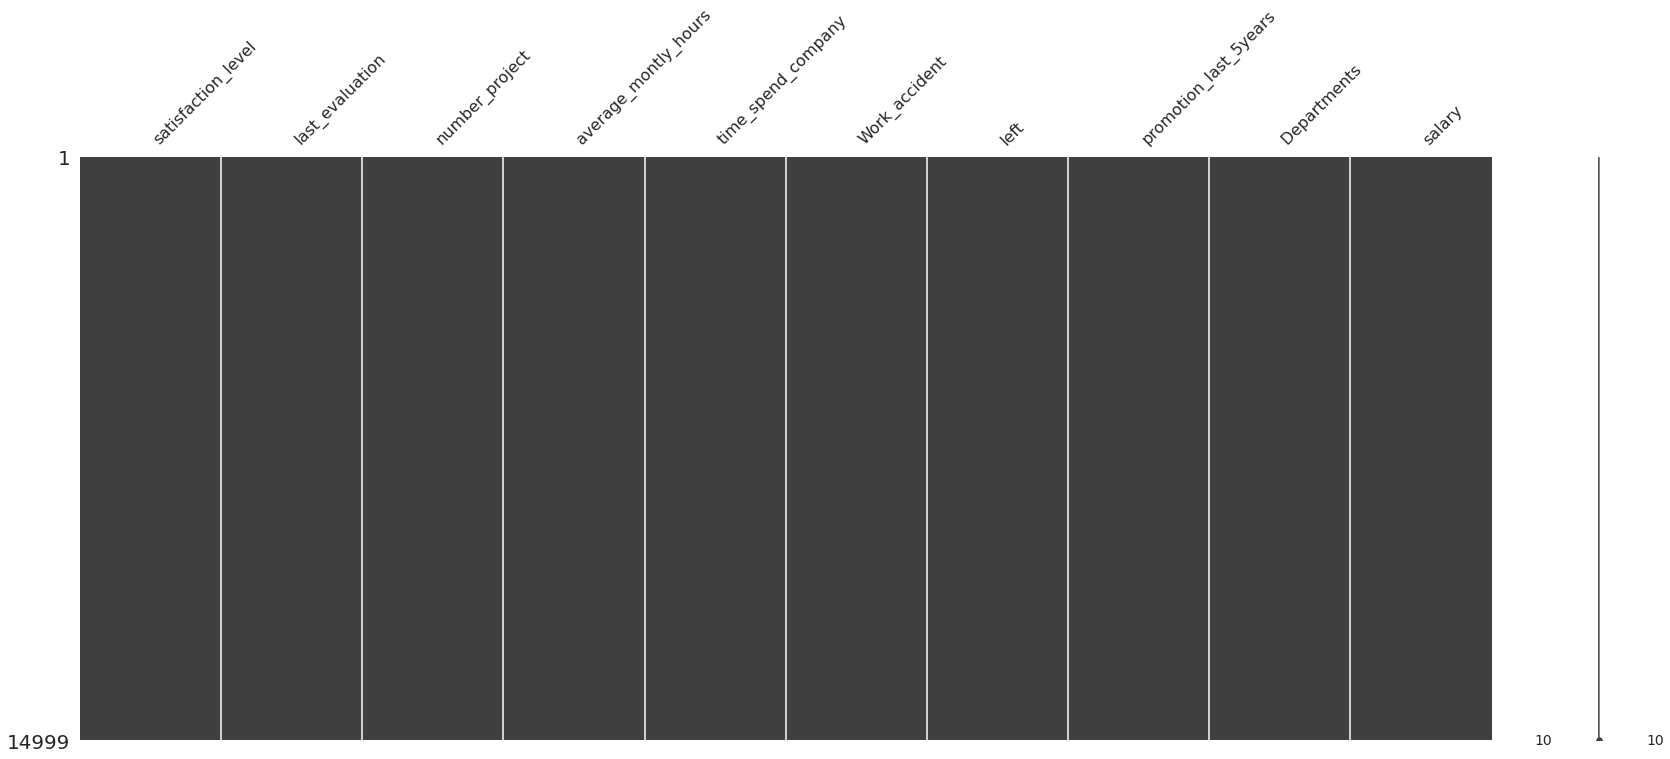

In [7]:
msno.matrix(df) 

In [8]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Departments ', 'salary'],
      dtype='object')

In [9]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


describing data

In [10]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


#because of data values being to close u cant use boxplot

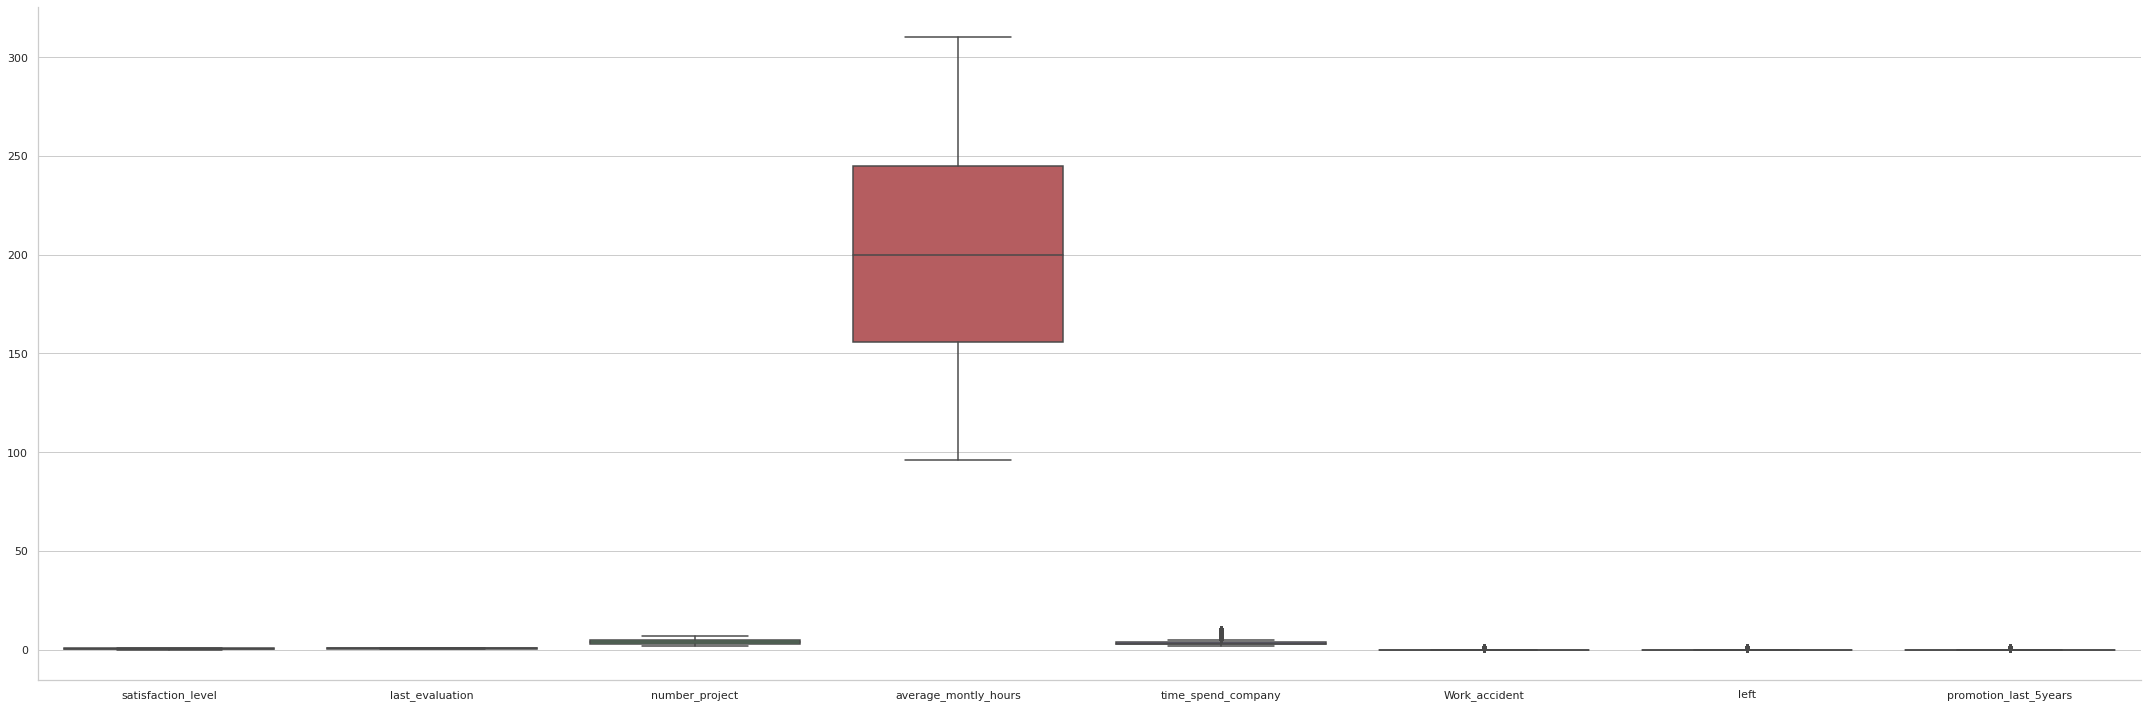

In [11]:
sns.factorplot(data=df,kind='box',size=10,aspect=3)

describing the density of the people who left the organisation wrt to data.

<AxesSubplot:xlabel='left', ylabel='Density'>

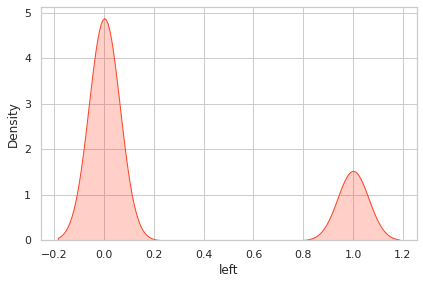

In [12]:
sns.kdeplot(df['left'],shade=True,color='#ff4125')

as above graph plotting every indidvidual data variations

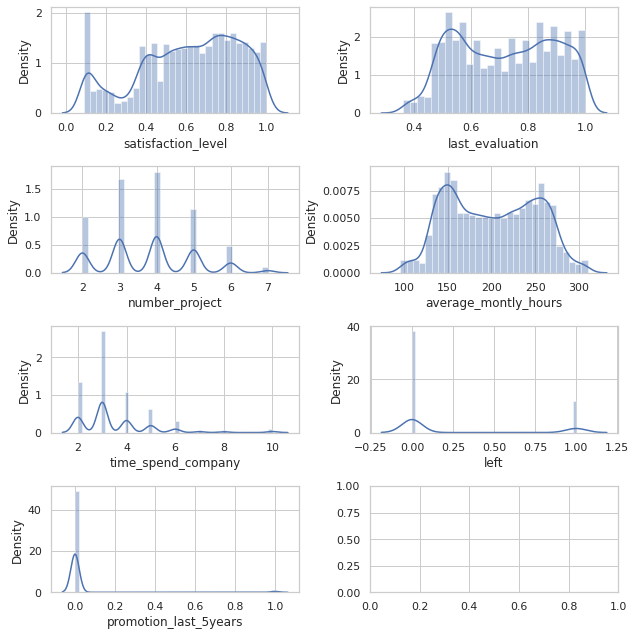

In [13]:
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

fig,ax = plt.subplots(4,2, figsize=(9,9))                
sns.distplot(df['satisfaction_level'], ax = ax[0,0]) 
sns.distplot(df['last_evaluation'], ax = ax[0,1]) 
sns.distplot(df['number_project'], ax = ax[1,0]) 
sns.distplot(df['average_montly_hours'], ax = ax[1,1]) 
sns.distplot(df['time_spend_company'], ax = ax[2,0]) 
sns.distplot(df['left'], ax = ax[2,1]) 
sns.distplot(df['promotion_last_5years'], ax = ax[3,0]) 
plt.tight_layout()
plt.show()

In [ ]:
#selectd data types with datatype as object

In [14]:
cat_df=df.select_dtypes(include='object')

In [ ]:
#prints those specific columns

In [15]:
cat_df.columns

Index(['Departments ', 'salary'], dtype='object')

In [ ]:
# as we have huge variations in object field trying to represent the values of each domain

In [16]:
def plot_cat(attr,labels=None):
    if(attr=='Departments'):
        sns.factorplot(data=df,kind='count',size=5,aspect=3,x=attr)
        return
    
    sns.factorplot(data=df,kind='count',size=5,aspect=1.5,x=attr)

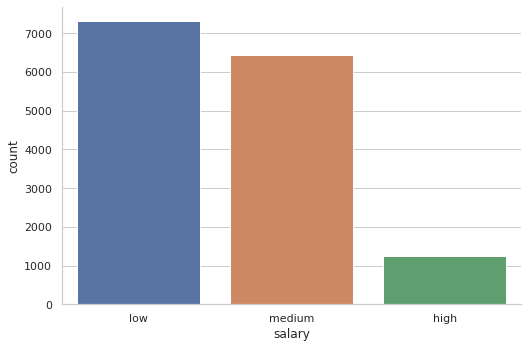

In [17]:
plot_cat('salary')

comparing the correlation of individual columns to the column left and finding their precent of impact

<AxesSubplot:>

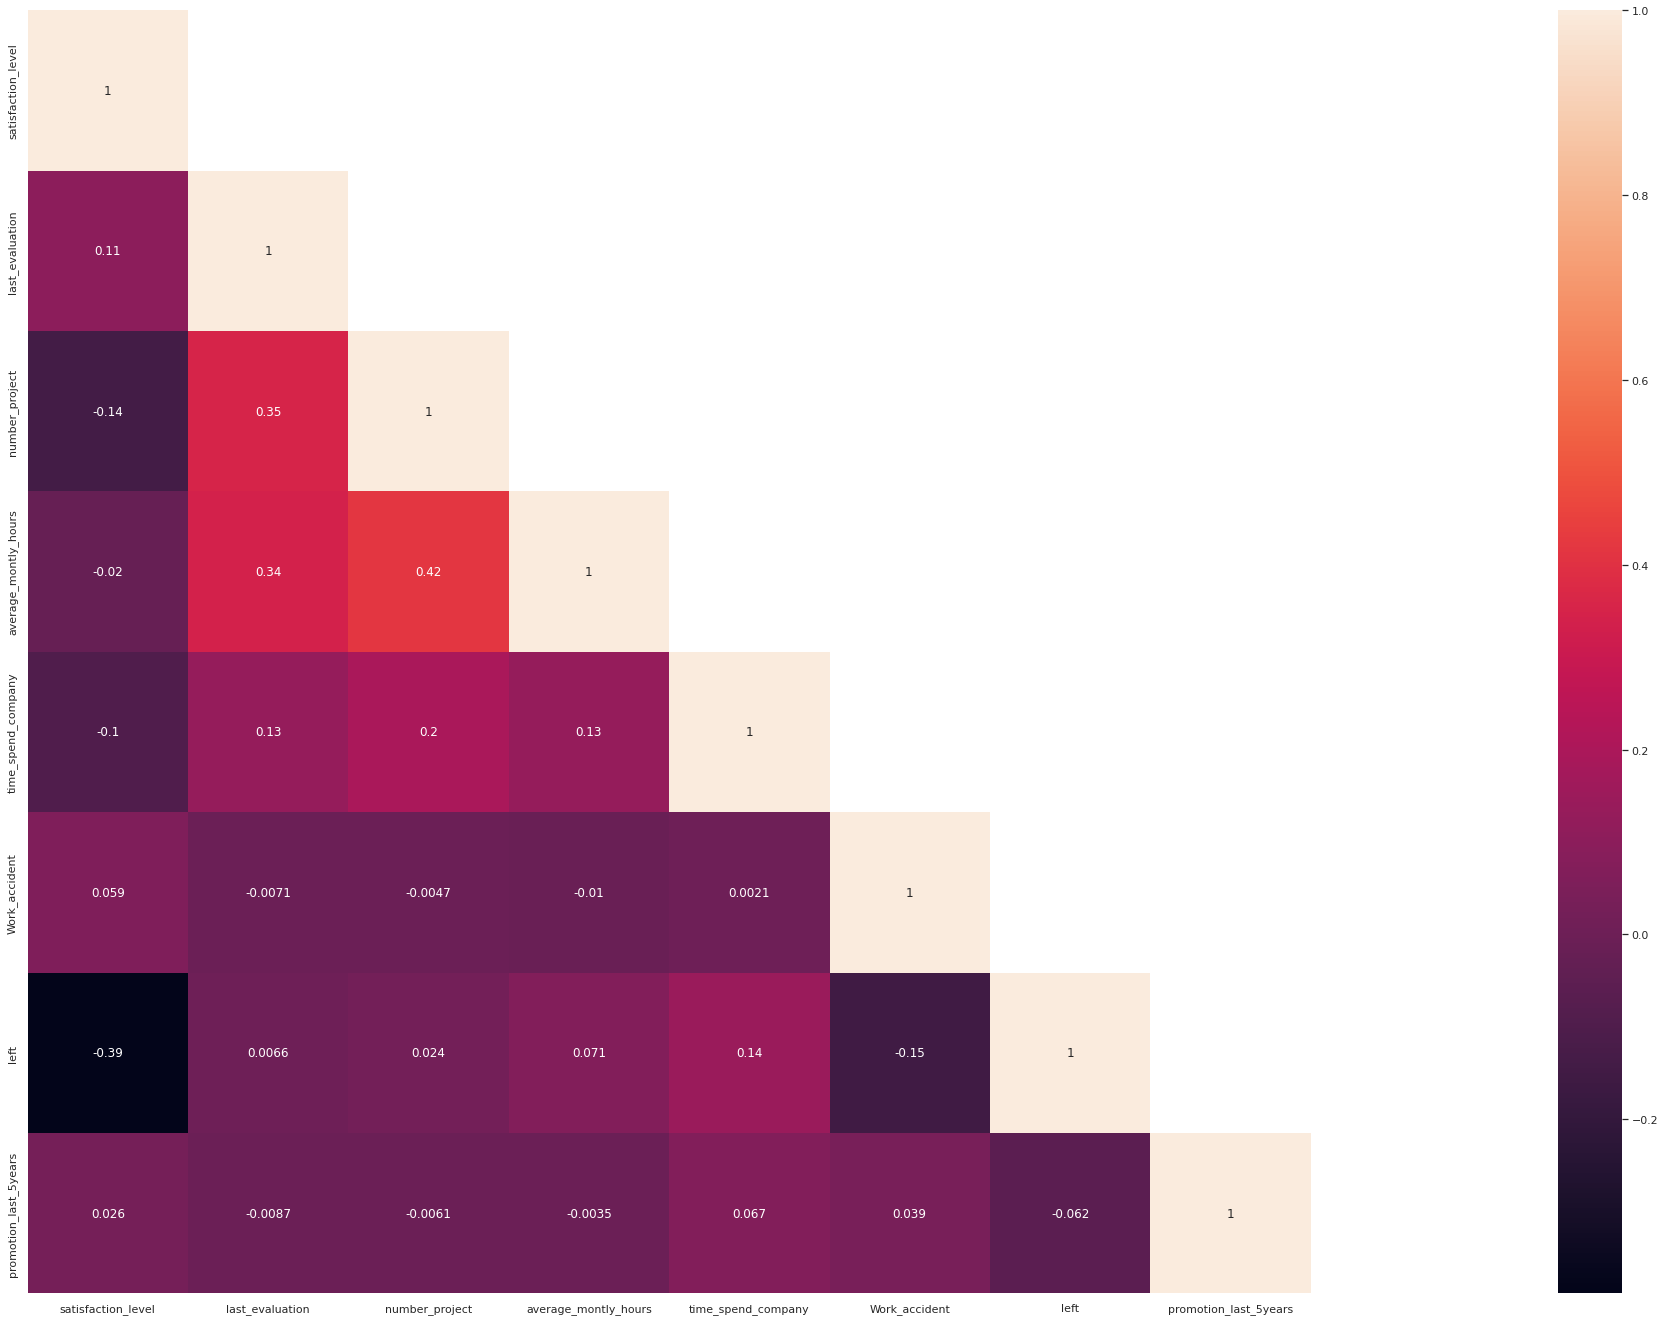

In [18]:
#corelation matrix.
cor_mat= df.corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig=plt.gcf()
fig.set_size_inches(79,22)
sns.heatmap(data=cor_mat,mask=mask,square=True,annot=True,cbar=True)

In [19]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Departments ', 'salary'],
      dtype='object')

In [ ]:
#comparing individual columns with column who have left

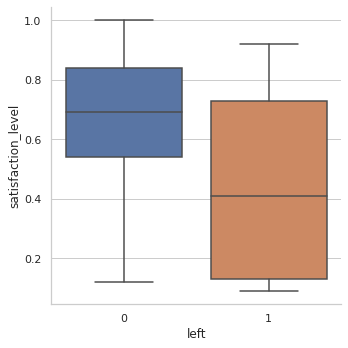

In [20]:
sns.factorplot(data=df,y='satisfaction_level',x='left',size=5,aspect=1,kind='box')

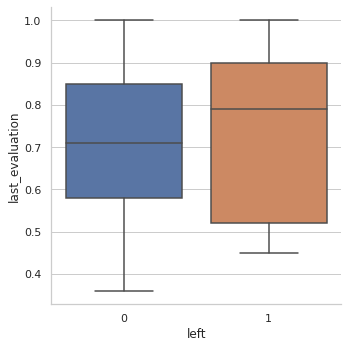

In [21]:
sns.factorplot(data=df,y='last_evaluation',x='left',size=5,aspect=1,kind='box')

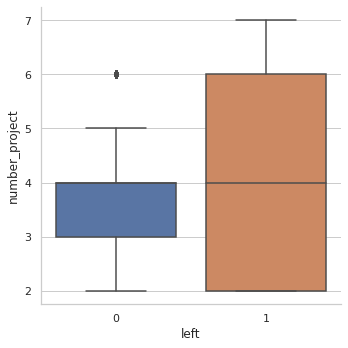

In [22]:
sns.factorplot(data=df,y='number_project',x='left',size=5,aspect=1,kind='box')

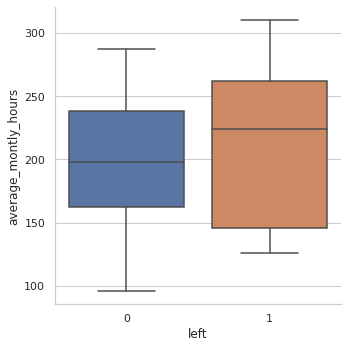

In [23]:
sns.factorplot(data=df,y='average_montly_hours',x='left',size=5,aspect=1,kind='box')

In [24]:
df["Departments "].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: Departments , dtype: int64

In [ ]:
#showing deviations of each individual domain in departments who have left

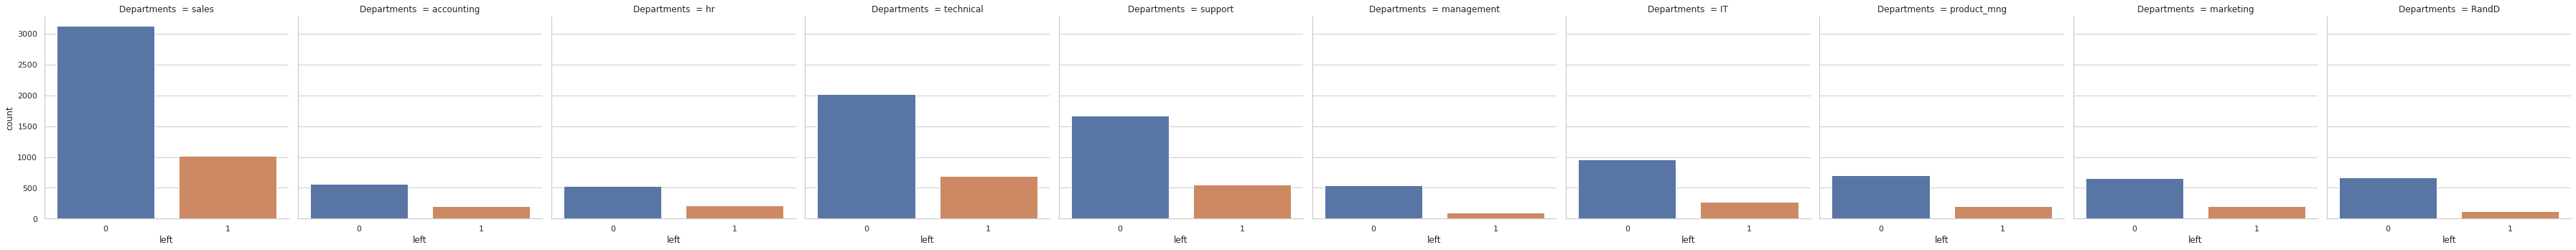

In [25]:
sns.factorplot(data=df,kind='count',x='left',col='Departments ')

In [26]:
df["department"]=df["Departments "]
df.drop("Departments ",axis =1,inplace = True)


In [27]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,department
0,0.38,0.53,2,157,3,0,1,0,low,sales
1,0.80,0.86,5,262,6,0,1,0,medium,sales
2,0.11,0.88,7,272,4,0,1,0,medium,sales
3,0.72,0.87,5,223,5,0,1,0,low,sales
4,0.37,0.52,2,159,3,0,1,0,low,sales


In [28]:
pd.crosstab(columns=[df.left],index=[df.department],margins=True,normalize='index') # set normalize=index to view rowwise %.


left,0,1
department,,
IT,0.777506,0.222494
RandD,0.846252,0.153748
accounting,0.734029,0.265971
hr,0.709066,0.290934
management,0.855556,0.144444
marketing,0.763403,0.236597
product_mng,0.780488,0.219512
sales,0.755072,0.244928
support,0.751009,0.248991


#for categorical values present in the

In [29]:
def transform(feature):
    le=LabelEncoder()
    df[feature]=le.fit_transform(df[feature])
    print(le.classes_)
    

In [30]:
cat_df=df.select_dtypes(include='object')
cat_df.columns

Index(['salary', 'department'], dtype='object')

In [31]:
for col in cat_df.columns:
    transform(col)

['high' 'low' 'medium']
['IT' 'RandD' 'accounting' 'hr' 'management' 'marketing' 'product_mng'
 'sales' 'support' 'technical']


In [32]:
df["left"].value_counts()

0    11428
1     3571
Name: left, dtype: int64

In [33]:
scaler=StandardScaler()
scaled_df=scaler.fit_transform(df.drop('left',axis=1))
X=scaled_df
Y=np.array(df['left'])

You use to_categorical to transform your training data before you pass it to your model. If your training data uses classes as numbers, to_categorical will transform those numbers in proper vectors for using with models

In [34]:
Y=to_categorical(Y)
Y


array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [35]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=42)


In [36]:
np.random.seed(42)
rn.seed(42)
tf.random.set_seed(42)

In [37]:
model=Sequential()
model.add(Dense(input_dim=9,units=8,activation='relu'))
model.add(Dense(units=16,activation='relu'))
model.add(Dense(units=2,activation='sigmoid'))

2022-11-08 03:06:42.014340: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [38]:
model.compile(optimizer=Adam(lr=0.01),loss='binary_crossentropy',metrics=['accuracy'])


In [39]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 80        
_________________________________________________________________
dense_1 (Dense)              (None, 16)                144       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 34        
Total params: 258
Trainable params: 258
Non-trainable params: 0
_________________________________________________________________


In [40]:
History=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10,verbose=1)


2022-11-08 03:06:42.168628: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10
352/352 [==============================] - 2s 3ms/step - loss: 0.2438 - accuracy: 0.9068 - val_loss: 0.1761 - val_accuracy: 0.9517
Epoch 2/10
352/352 [==============================] - 1s 2ms/step - loss: 0.1618 - accuracy: 0.9515 - val_loss: 0.1632 - val_accuracy: 0.9549
Epoch 3/10
352/352 [==============================] - 1s 2ms/step - loss: 0.1513 - accuracy: 0.9561 - val_loss: 0.1590 - val_accuracy: 0.9557
Epoch 4/10
352/352 [==============================] - 1s 2ms/step - loss: 0.1456 - accuracy: 0.9574 - val_loss: 0.1427 - val_accuracy: 0.9592
Epoch 5/10
352/352 [==============================] - 1s 2ms/step - loss: 0.1360 - accuracy: 0.9620 - val_loss: 0.1433 - val_accuracy: 0.9573
Epoch 6/10
352/352 [==============================] - 1s 2ms/step - loss: 0.1314 - accuracy: 0.9626 - val_loss: 0.1381 - val_accuracy: 0.9589
Epoch 7/10
352/352 [==============================] - 1s 2ms/step - loss: 0.1293 - accuracy: 0.9626 - val_loss: 0.1404 - val_accuracy: 0.9597
Epoch 

In [41]:
predictions = (model.predict(x_test) > 0.5).astype("int32")

In [46]:
model.predict(x_test)



AttributeError: 'numpy.ndarray' object has no attribute 'count'

In [43]:
model.evaluate(x_test,y_test)

118/118 [==============================] - 0s 1ms/step - loss: 0.1411 - accuracy: 0.9603


[0.1410626322031021, 0.960266649723053]

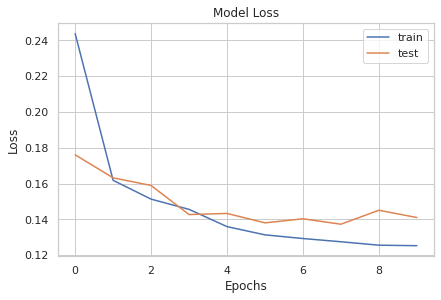

In [44]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()